In [1]:
%load_ext autoreload
%autoreload 2

This is an example for Na I D equivalent width (EW) estimation.

In [2]:
import sys
sys.path.append('..')
sys.path.append('../tools/')
import absorption_line_vel as vel
from absorption_line_vel import SpectrumSN_Lines, AbsorbLine

import pymc as pm
import arviz as az
import numpy as np

# read spec data
z = 0.0307
spec = '../../SN2020jgb/spectroscopy/SN2020jgb/host_20220331_Keck2_corrected.ascii'
Spec = SpectrumSN_Lines(spec, 0)

# Na I D

<AxesSubplot:>

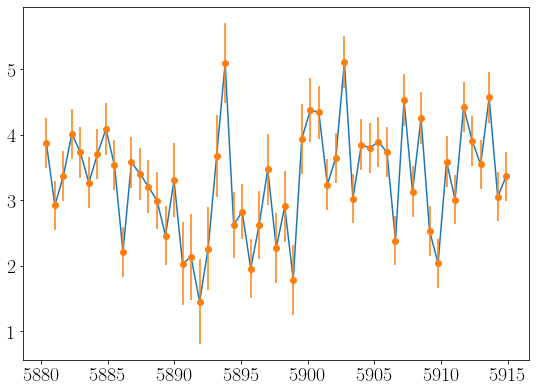

In [3]:
Spec.plot_line_region(5880, 5915)

In [4]:
Spec.add_line('NaI_D', 5880, 5910, lines=[
              [5889.950, 5895.924]], rel_strength=[[2, 1]])


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [blue_fl, red_fl, A, v_mean, ln_v_var, sigma_0]


Sampling 4 chains for 2_000 tune and 1_000 draw iterations (8_000 + 4_000 draws total) took 14 seconds.
There were 4 divergences after tuning. Increase `target_accept` or reparameterize.
The acceptance probability does not match the target. It is 0.9061, but should be close to 0.95. Try to increase the number of tuning steps.


             mean      sd  hdi_16%  hdi_84%  mcse_mean  mcse_sd  ess_bulk  \
v_mean[0]  46.601  60.148   17.389   92.578      2.848    2.592   953.822   
v_sig[0]   89.489  40.317   40.411  111.659      1.296    0.918   832.328   
A[0]      -44.158  17.385  -61.622  -28.638      0.658    0.465   789.476   
sigma_0     0.191   0.033    0.156    0.218      0.001    0.000  2466.876   
EW_0        2.271   0.864    1.538    3.154      0.033    0.024   798.830   

           ess_tail  r_hat  
v_mean[0]   714.472  1.003  
v_sig[0]    561.773  1.008  
A[0]        479.054  1.006  
sigma_0    2481.916  1.001  
EW_0        479.521  1.006  


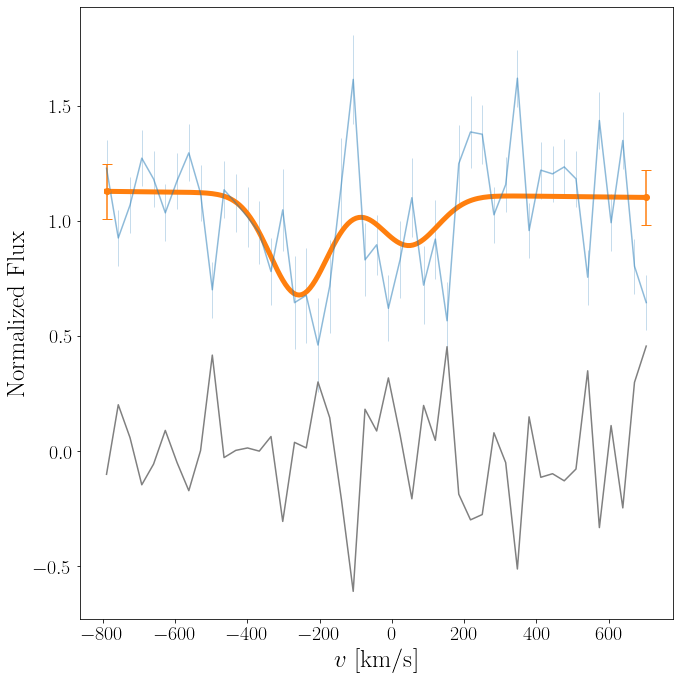

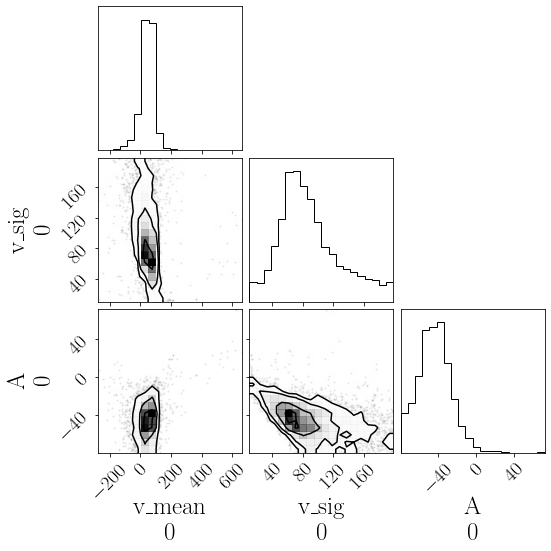

In [5]:
trace_NaI, Model_NaI = Spec.line['NaI_D'].MCMC_sampler(
    vel_mean_mu=[0], vel_mean_sig=[2e2], #typical velocity dispersion <= 200 km/s
    vel_var_lim=[1e2, 4e4],
    A_lim=[-8e1, 8e1],
    nburn=2000,
    target_accept=0.95,
    initial=[1, 1, 0, 8, -30], Plot_mcmc=True)


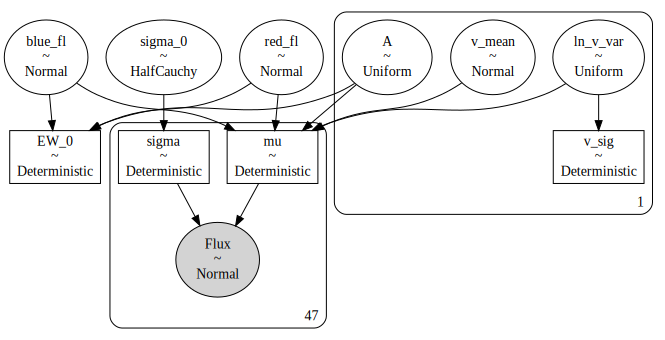

In [6]:
pm.model_to_graphviz(Model_NaI)